In [1]:
import preprocess as pp
import util
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader

## Initializing the Word Generator

In [2]:
char_dataset = util.load_dataset('char', equal_shapes=False)
char_data_loader = DataLoader(char_dataset, shuffle=True, num_workers=0, pin_memory=True)

base_char_pad = 0  # nr. of extra pixels between each char in the base word. Default is 8
crpt_char_pad = lambda: np.random.uniform(-12, 6)  # idem but for the corrupted word. Can also be a function that outputs an int.
                                                   # usually a good idea to make it negative, cause then the chars will overlap

cwg = pp.CorruptWordGen(char_data_loader, img_shape=64, n_char_range=(2, 10), batch_size=8)

## Using it in a Loop
A CorruptedWordGen object functions as an iterator, meaning that you can (or should be able to) loop over the same object in a for loop multiple times, cause each time the iter() function is called, which resets the state.

base word shape torch.Size([8, 1, 64, 256]) consists of:
	nr. of words: 8
         RGB/grayscale channel (3 if RGB 1 if GS): 1
	word img height: 64
	word img width: 256

generated words in Hebrew:
צבשטדן
סחסכםזעס
תסקיחטטאב
כשאל
חםקסנ
םע
אתלבחתש
תוא


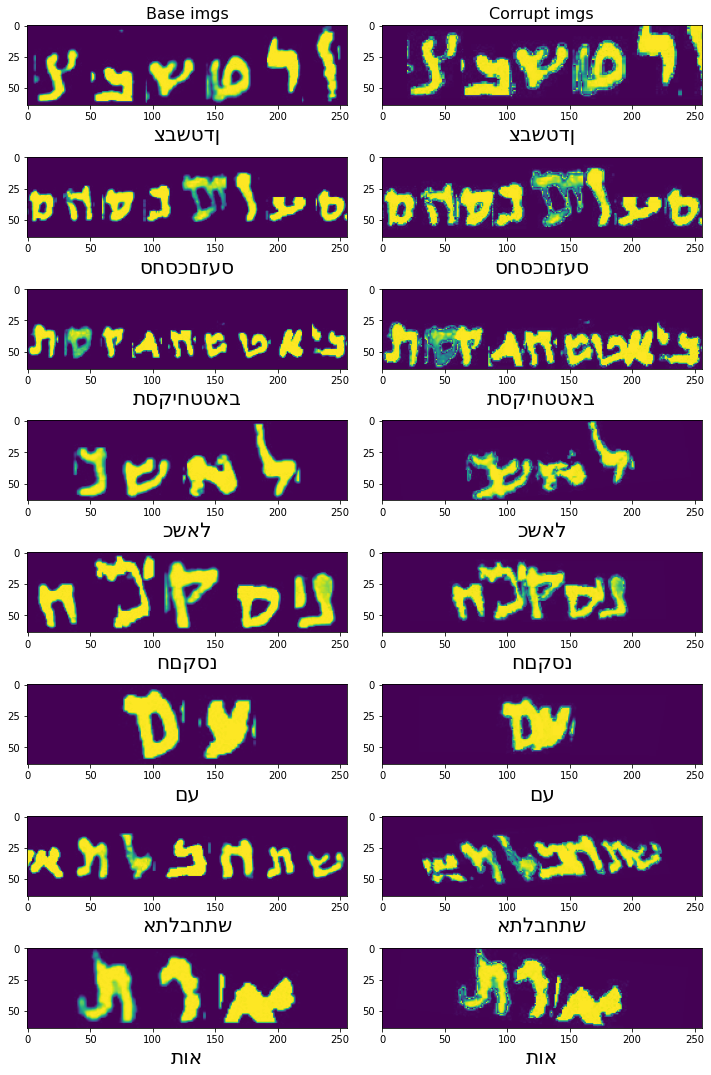

In [5]:
for base_words, crpt_words, labels in cwg:
  print("base word shape {} consists of:\n\tnr. of words: {}\n\
         RGB/grayscale channel (3 if RGB 1 if GS): {}\n\tword img height: {}\n\tword img width: {}"
        .format(base_words.shape, *base_words.shape))
  
  n_words = len(base_words)
  words_in_hebrew = [util.transcribe_label(lab) for lab in labels]
  
  print("\ngenerated words in Hebrew:\n{}".format('\n'.join([util.transcribe_label(lab) for lab in labels])))
  
  fig, axes = plt.subplots(n_words, 2, figsize=(10,15))
  
  for ax, base_word, crpt_word, hebrew in zip(axes, base_words, crpt_words, words_in_hebrew):
    ax[0].imshow(base_word[0,:,:])  # Need to remove the grayscale channel dimension for imshow to work.
    util.working_imshow(crpt_word, ax[1])  # Or you can use the dynamic imshow function from util, which corrects for the dimension.
    
    ax[0].set_xlabel(hebrew, fontsize=20)  # Set x labels to the word
    ax[1].set_xlabel(hebrew, fontsize=20)
  
  axes[0,0].set_title("Base imgs", fontsize=16)
  axes[0,1].set_title("Corrupt imgs", fontsize=16)
  plt.tight_layout()
  plt.show()
  
  break  # To avoid every batch being shown in a plot